In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob
from astropy.io import fits

In [3]:
def naive_map(data,ra,dec,ra_num_bins=60,dec_num_bins=50):
    ra_bins = np.linspace(ra.min(),ra.max(),ra_num_bins)
    dec_bins = np.linspace(dec.min(),dec.max(),dec_num_bins)
    p,_,_ = np.histogram2d(ra,dec,bins=(ra_bins,dec_bins),weights=data)
    hits,_,_ = np.histogram2d(ra,dec,bins=(ra_bins,dec_bins))
    return p, hits, ra_bins, dec_bins

In [4]:
def get_data(bank="A"):
    fnames = glob.glob('/data2/GBT/S140/Daisy/*/*_05_*'+bank+'*.rfireduced_new.npz')
    fnames.sort()
    calibrations = np.load('/home/mabitbol/GBT-S140/calibrations/calibration_3C295_05_'+bank+'.npy').item()
    fdiode = calibrations['freqs']
    pdiode = calibrations['pdiode']
    pdiode1 = calibrations['pdiode1']
    meanpower = 0.5 * (pdiode + pdiode1)
    calibrated = [] 
    ras = []
    decs = []
    meansub = []
    azs = []
    els = []
    for fname in fnames:
        nz = np.load(fname)
        ra = nz['sra']
        dec = nz['sdec']
        mask = nz['valid']
        az = nz['AZIMUTH'][::8]
        el = nz['ELEVATIO'][::8]
        freqs = nz['freqs']
            
        gain = meanpower / ( nz['xxon'] - nz['xxoff'])
        calibd = nz['xxoff'] * gain
        #calibd = calibd[:, mask]

        calibrated = np.concatenate([calibrated, np.nanmean(calibd - np.nanmedian(calibd,0), 1)])
        meansub = np.concatenate([meansub, np.nanmean(calibd,1) - np.nanmedian(np.nanmean(calibd,1))])
        ras = np.concatenate([ras, ra])
        decs = np.concatenate([decs, dec])
        azs = np.concatenate([azs, az])
        els = np.concatenate([els, el])
    return calibrated, meansub, ras, decs, azs, els

In [49]:
calibrated, meansub, ras, decs, azs, els = get_data('A')

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:28: RuntimeWarning: Mean of empty slice
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: Mean of empty slice


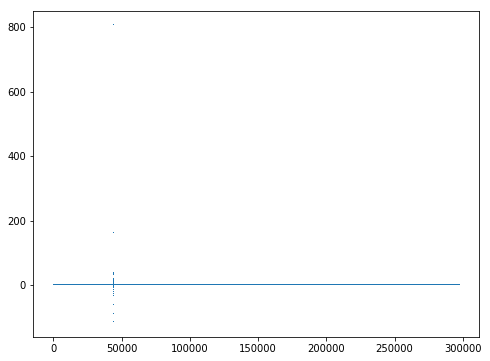

In [50]:
plot(calibrated, ',')

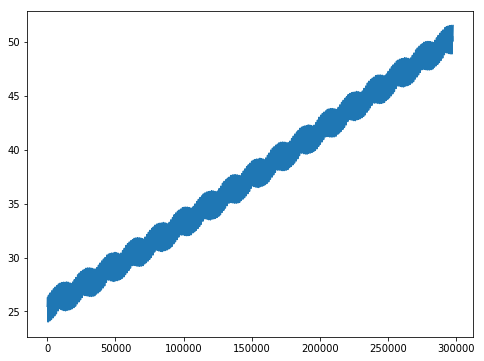

In [46]:
plot(els)

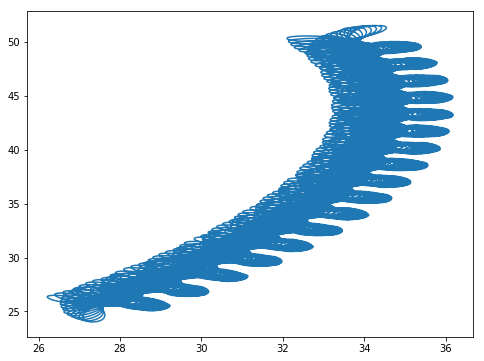

In [47]:
plot(azs, els)

In [29]:
ts = np.arange(len(calibrated))

In [30]:
tmask = (ts < 42000) | (ts > 50000 ) 

In [31]:
ts2 = np.arange(len(calibrated[tmask]))

In [32]:
tmask2 = (ts2 < 180000) | (ts2 > 240000)

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 297546 but corresponding boolean dimension is 289545
  if __name__ == '__main__':


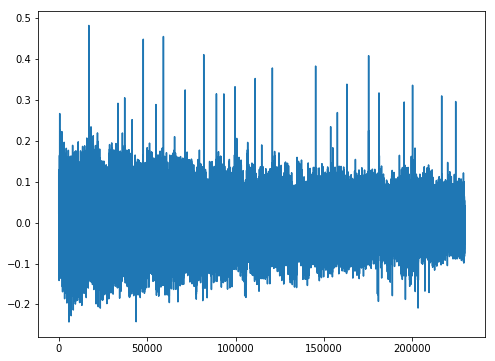

In [33]:
plot(calibrated[tmask2])

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


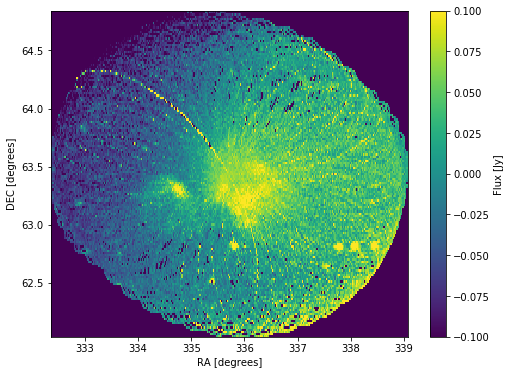

In [51]:
datamap, hits, rabins, decbins = naive_map(calibrated, ras, decs, 300, 150)
mask = hits == 0
signalA = datamap / hits
signalA[mask] = np.nan
figsize(8,6)
pc = pcolormesh(rabins, decbins, signalA.T)
clim(-0.1, 0.1)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')
cb.set_label('Flux [Jy]')

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 297546 but corresponding boolean dimension is 289545
  if __name__ == '__main__':
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


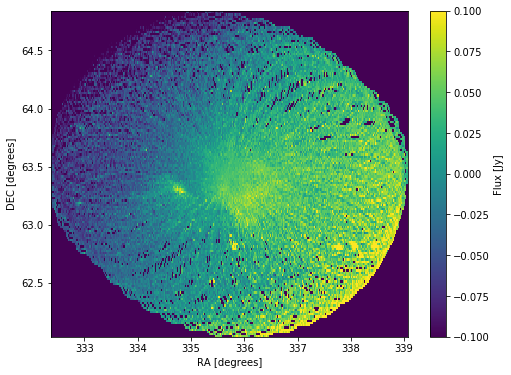

In [37]:
datamap, hits, rabins, decbins = naive_map(calibrated[tmask2], ras[tmask2], decs[tmask2], 300, 150)
mask = hits == 0
signalA1 = datamap / hits
signalA1[mask] = np.nan
figsize(8,6)
pc = pcolormesh(rabins, decbins, signalA1.T)
clim(-0.1, 0.1)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')
cb.set_label('Flux [Jy]')

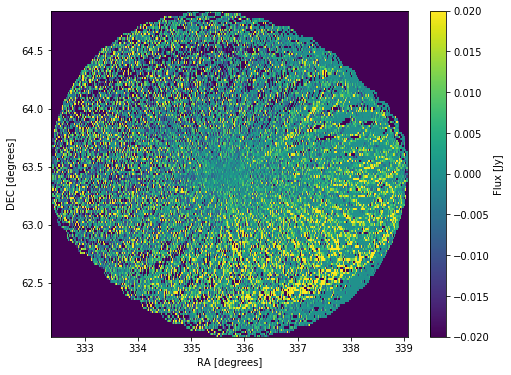

In [42]:
figsize(8,6)
pc = pcolormesh(rabins, decbins, signalA1.T - signalA.T)
clim(-0.02, 0.02)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')
cb.set_label('Flux [Jy]')

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


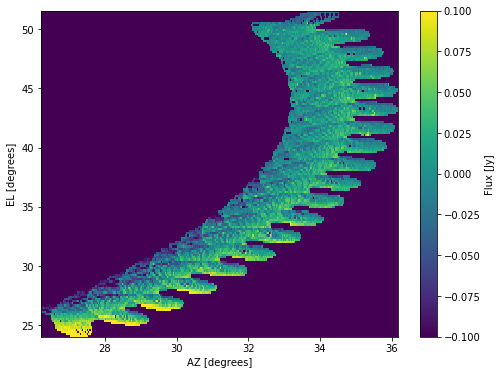

In [44]:
datamap, hits, rabins, decbins = naive_map(calibrated, azs, els, 300, 150)
mask = hits == 0
signalA = datamap / hits
signalA[mask] = np.nan
figsize(8,6)
pc = pcolormesh(rabins, decbins, signalA.T)
clim(-0.1, 0.1)
cb = colorbar()
xlabel('AZ [degrees]')
ylabel('EL [degrees]')
cb.set_label('Flux [Jy]')

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


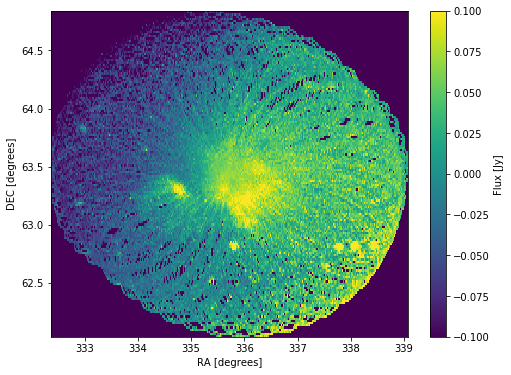

In [15]:
datamap, hits, rabins, decbins = naive_map(calibrated[tmask][tmask2], ras[tmask][tmask2], decs[tmask][tmask2], 300, 150)
mask = hits == 0
signalA = datamap / hits
signalA[mask] = np.nan
figsize(8,6)
pc = pcolormesh(rabins, decbins, signalA.T)
clim(-0.1, 0.1)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')
cb.set_label('Flux [Jy]')

In [11]:
def get_data(bank="A"):
    fnames = glob.glob('/data2/GBT/S140/Daisy/*/*_05_*'+bank+'*.fits')
    fnames.sort()
    calibrations = np.load('/home/mabitbol/GBT-S140/calibrations/calibration_3C295_05_'+bank+'.npy').item()
    fdiode = calibrations['freqs']
    pdiode = calibrations['pdiode']
    pdiode1 = calibrations['pdiode1']
    meanpower = 0.5 * (pdiode + pdiode1)
    calibrated = [] 
    ras = []
    decs = []
    meansub = []
    azs = []
    els = []
    for fname in fnames:
        f = fits.open(fname)
        hdu = f[1]
        data = hdu.data['DATA']
        nchannels = 512

        N = 2**14
        df = hdu.data['CDELT1'][0]
        center_freq = hdu.data['CRVAL1'][0]
        centerbin = hdu.data['CRPIX1'][0]
        index = np.arange(N)
        if_freqs = freqstest = index * (-df) # in Hz
        freqs = (center_freq + df * (index + 1 - centerbin))[::-1]

        xxoff = data[::8,::-1]
        xxon = data[1::8,::-1]

        mask = np.ones(N, dtype=bool)
        mask[(index % 512) == 511] = False
        mask[if_freqs < 150.e6] = False
        mask[if_freqs > 1400.e6] = False

        if bank == 'A':
            mask[(freqs >= 4.225e9) & (freqs <= 4.375e9)] = False

        xxoff[:, ~mask] = np.nan

        ratio = np.zeros(N)
        ratio[mask] = np.nanstd(xxoff[:, mask], 0) / np.nanmean(xxoff[:, mask], 0)
        ratio[~mask] = np.nan
        ratio_mad = 5. / 0.67449 * mad(ratio[mask])
        bad = np.zeros_like(mask)
        bad[mask] = np.abs(ratio[mask] - np.nanmean(ratio[mask])) > ratio_mad
        mask[bad] = False
        xxoff[:, ~mask] = np.nan

        msdata = np.zeros_like(xxoff)
        msdata[:, mask] = xxoff[:, mask] - np.nanmean(xxoff[:, mask], 0)
        msdata[:, ~mask] = np.nan

        speck = np.zeros(xxoff.shape[1])
        speck[mask] = np.nanmean((msdata[:, mask]**4), 0) / np.nanmean((msdata[:, mask]**2), 0)**2
        speck[~mask] = np.nan
        speck_mad = 5. / 0.67449 * mad(speck[mask])
        bad = np.zeros_like(mask)
        bad[mask] = np.abs(speck[mask] - np.nanmean(speck[mask])) > speck_mad
        mask[bad] = False

        xxoff[:, ~mask] = np.nan
        xxon[:, ~mask] = np.nan

        xxoff_s = np.nanmean(xxoff.reshape(-1, nchannels, N//nchannels), 2)
        xxon_s = np.nanmean(xxon.reshape(-1, nchannels, N//nchannels), 2)

        freqs = np.nanmean(freqs.reshape(nchannels, -1), 1)
        mask = np.sum(mask.reshape(nchannels, -1).astype(int), 1) > 0
        
        ra = hdu.data['CRVAL2'][::8]
        dec = hdu.data['CRVAL3'][::8]
        az = hdu.data['AZIMUTH'][::8]
        el = hdu.data['ELEVATIO'][::8]
            
        gain = meanpower / ( xxon_s - xxoff_s)
        calibd = xxoff_s * gain
        #calibd = calibd[:, mask]

        calibrated = np.concatenate([calibrated, np.nanmean(calibd - np.nanmedian(calibd,0), 1)])
        meansub = np.concatenate([meansub, np.nanmean(calibd,1) - np.nanmedian(np.nanmean(calibd,1))])
        ras = np.concatenate([ras, ra])
        decs = np.concatenate([decs, dec])
        azs = np.concatenate([azs, az])
        els = np.concatenate([els, el])
    return calibrated, meansub, ras, decs, azs, els

In [3]:
def mad(x, axis=None):
    return np.nanmedian(np.abs(x - np.nanmedian(x, axis)), axis)